# ISYS2407 Information Systems Solutions & Design

# Data Science Project

## 1) Importing Libraries

In [1]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Library for replacing labels with numbers
from sklearn.preprocessing import LabelEncoder

# Libary needed for onehot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
# Just use pandas get_dummies which is a lot easier to use 

# Model library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Library for performing grid search
from sklearn.model_selection import GridSearchCV

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Libraries to select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

## 2) Loading dataset

In [2]:
#Loading dataset and viewing the first 5 rows and number of rows and columns
df = pd.read_csv('passenger-satisfaction.csv')
print(df.shape)
df.head()

(103904, 24)


,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
#checking the column types
df.dtypes

id                                     int64
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
inflight_wifi_service                  int64
convenient_departure_arrival_time      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay(mins)                  int64
arrival_de

In [4]:
#checking for missing values if any
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   gender                             103904 non-null  object 
 2   customer_type                      103904 non-null  object 
 3   age                                103904 non-null  int64  
 4   type_of_travel                     103904 non-null  object 
 5   class                              103904 non-null  object 
 6   flight_distance                    103904 non-null  int64  
 7   inflight_wifi_service              103904 non-null  int64  
 8   convenient_departure_arrival_time  103904 non-null  int64  
 9   ease_of_online_booking             103904 non-null  int64  
 10  gate_location                      103904 non-null  int64  
 11  food_and_drink                     1039

In [5]:
print(df.isnull().sum());
#arrival_delay contains missing values

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
convenient_departure_arrival_time      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay(mins)                  0
arrival_delay(mins)                  310
satisfaction                           0
dtype: int64


In [6]:
percent_missing = round(df.isna().mean() * 100, 4)
print(percent_missing)

id                                   0.0000
gender                               0.0000
customer_type                        0.0000
age                                  0.0000
type_of_travel                       0.0000
class                                0.0000
flight_distance                      0.0000
inflight_wifi_service                0.0000
convenient_departure_arrival_time    0.0000
ease_of_online_booking               0.0000
gate_location                        0.0000
food_and_drink                       0.0000
online_boarding                      0.0000
seat_comfort                         0.0000
inflight_entertainment               0.0000
onboard_service                      0.0000
leg_room_service                     0.0000
baggage_handling                     0.0000
checkin_service                      0.0000
inflight_service                     0.0000
cleanliness                          0.0000
departure_delay(mins)                0.0000
arrival_delay(mins)             

# 3) Deleting any duplicate rows

In [7]:
print(df.shape)

# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates(inplace=True) # will keep first copy

# You may want to reset the index
# REf: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
df.reset_index(drop=True, inplace=True) # reset index to default integer index

# Check
print(df.shape)

(103904, 24)
(103904, 24)


# 4) Summary and Descriptive Statistics

In [8]:
print(f"Features : {df.columns.tolist()}")
print()

# Print the total number of null values in the data
# Null values are - NaN (not a number), or blank spaces
# 0 is not a null value - it's a valid value
print(f"Missing values :  {df.isnull().sum().values.sum()}")

# 2 unique values in column - binary categorical variable e.g. male/female, yes/no, etc
# less than 6 values in columns - still a categorical value but with more than 2 classes
# large number of values - continuous variable
print(f"Unique values :  {df.nunique()}")

Features : ['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'convenient_departure_arrival_time', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay(mins)', 'arrival_delay(mins)', 'satisfaction']

Missing values :  310
Unique values :  id                                   103904
gender                                    2
customer_type                             2
age                                      75
type_of_travel                            2
class                                     3
flight_distance                        3802
inflight_wifi_service                     6
convenient_departure_arrival_time         6
ease_of_online_booking                    6
gate_location                             6
food_and_drink   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
flight_distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
convenient_departure_arrival_time,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
ease_of_online_booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
gate_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
food_and_drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
online_boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
seat_comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


# 5) Dropping rows with missing values

In [10]:
print(df.shape)
df.dropna(inplace=True);
df.shape

(103904, 24)


(103594, 24)

# 6) Discretization of continuous variable

In [11]:
cols_to_disc = ['age'];

def discretization(df):
    if df['age']<=20:
        return 'young'
    elif (df['age']>20) & (df['age']<50):
        return 'adult'
    elif df['age']>=50:
        return 'old'

df = df.copy()
df['age_split'] = df.apply(lambda df:discretization(df),axis=1)

df.drop('age',axis=1,inplace=True);
df.head()

,id,gender,customer_type,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,gate_location,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction,age_split
0,70172,Male,Loyal Customer,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,young
1,5047,Male,Disloyal Customer,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,adult
2,110028,Female,Loyal Customer,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,adult
3,24026,Female,Loyal Customer,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,adult
4,119299,Male,Loyal Customer,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,old


# 7) Visualizations

## 7.1) Correlation between features

Text(0.5, 1.0, 'Correlation between features')

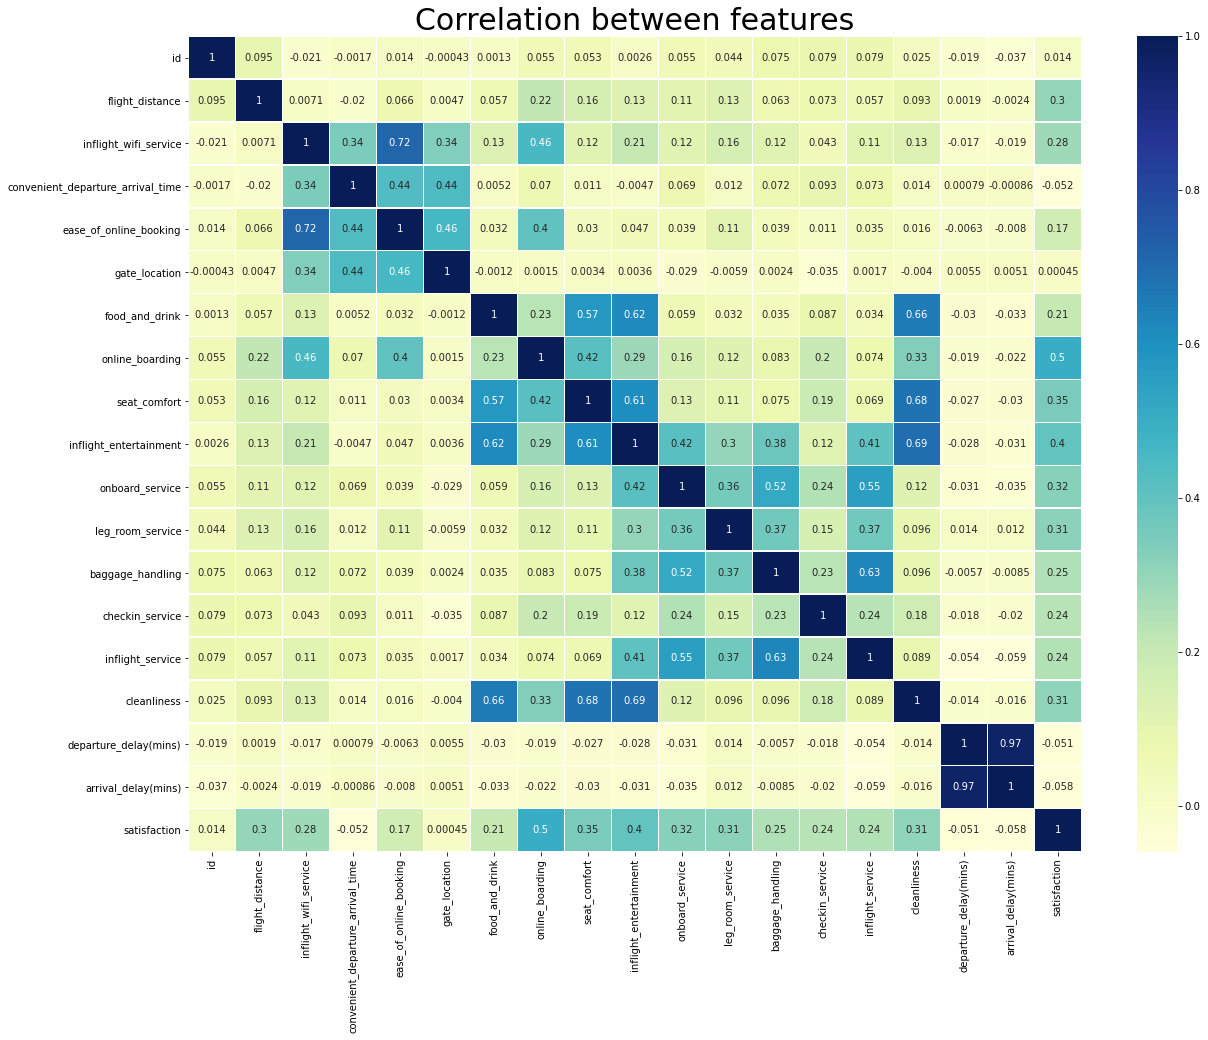

In [12]:
plt.rcParams['figure.figsize'] = (20, 15) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu") # YellowGreenBlue
plt.title('Correlation between features', fontsize = 30)
# The colours show the strength of the correlations - from yellow (weak) to dark blue (strong)
# Cells on the diagonal are dark blue (corr=1) - correlation of the variable with itself

## 7.2) Satisfied or Unsatisfied Customers

labels: ['Dissatisfied', 'Satisfied']
values: [58697, 44897]


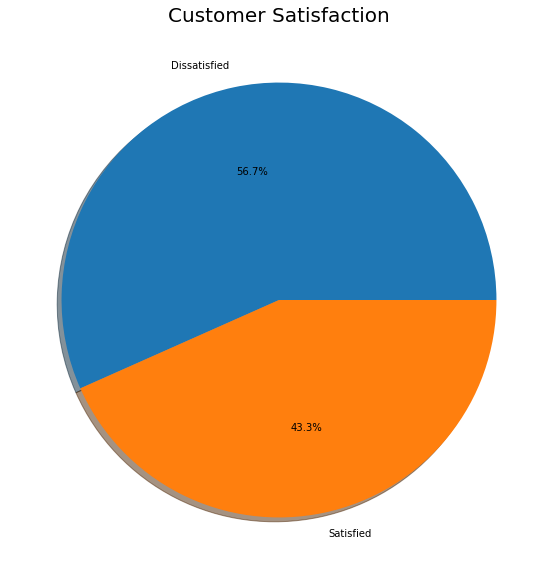

In [13]:
labels = ["Dissatisfied", "Satisfied"];
print(f"labels: {labels}");

# Get the values from the "outcome" column - use values to get the values
values = df["satisfaction"].value_counts().values.tolist();
print(f"values: {values}");

# Use matplotlib to draw a simple pie chart
plt.figure(figsize=(10,10)); #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True);
plt.title("Customer Satisfaction", fontsize=20);

##### The pie chart shows that majority of the customers were satisfied with the airline

## 7.3) Visualization of continuous variables

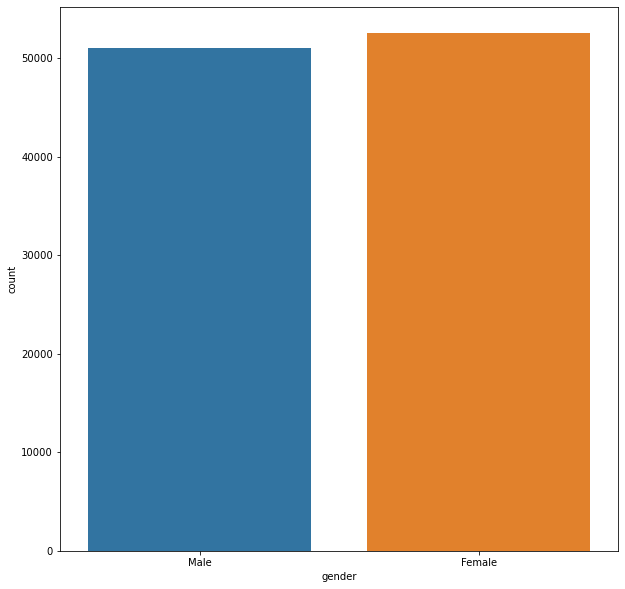

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x="gender", data=df);

###### Majority of the customers were female

<AxesSubplot:xlabel='gender', ylabel='count'>

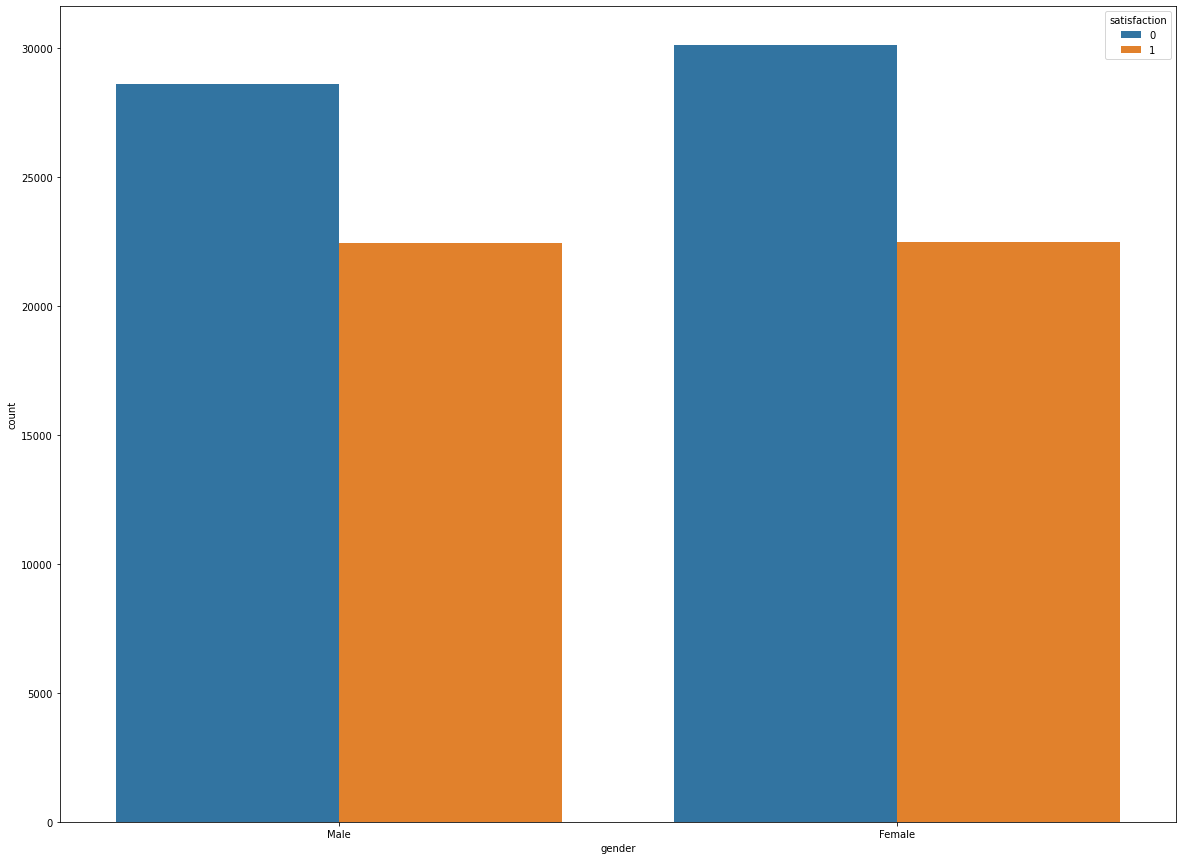

In [15]:
sns.countplot(x='gender',data=df,hue='satisfaction') # grouped by outcome

##### The countplot shows that majority of both male and female were dissatisfied with the airline's services

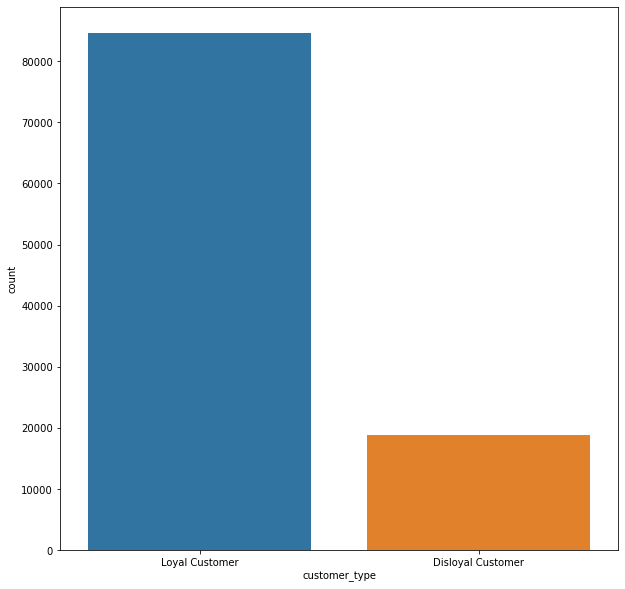

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="customer_type", data=df);

##### Majority of the customers were loyal

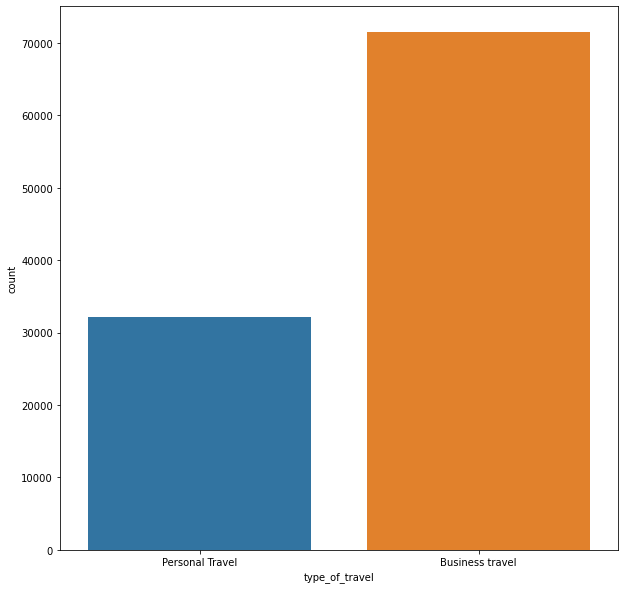

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x="type_of_travel", data=df);

##### Business Travel accounted for more than 70000 customers

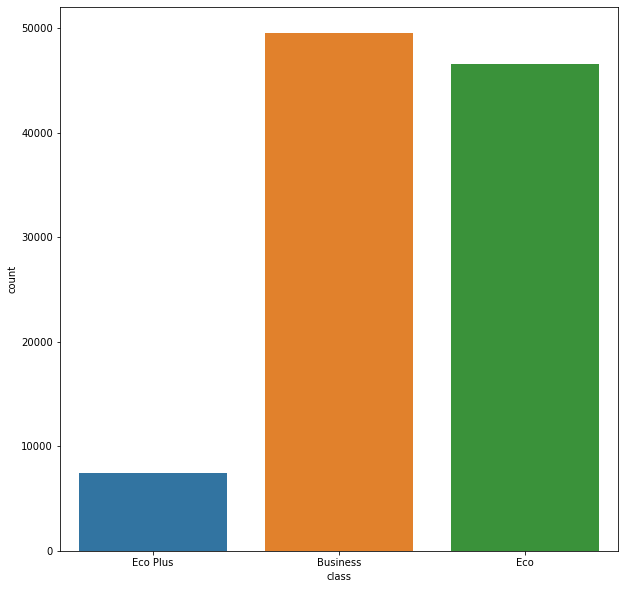

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x="class", data=df);

##### Business class was the most preferred and Eco Plus the least preferred

<AxesSubplot:xlabel='age_split', ylabel='count'>

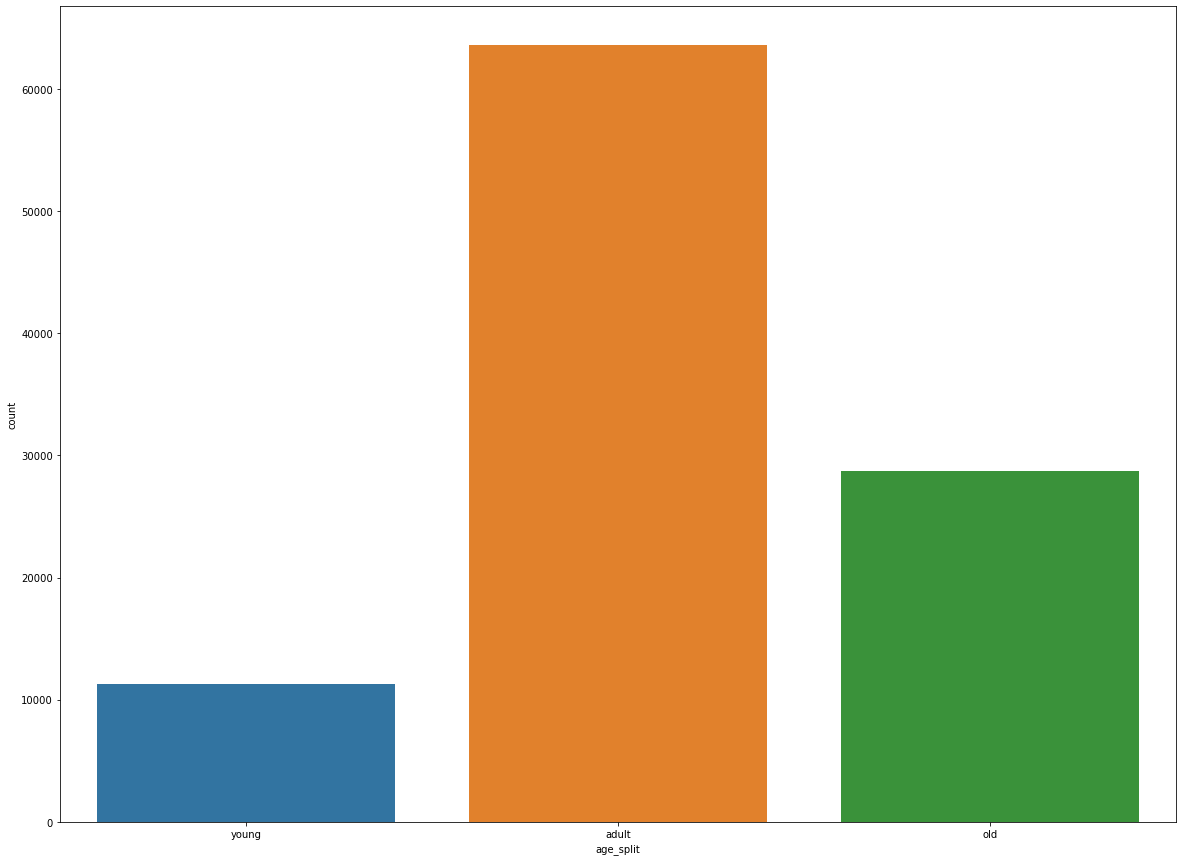

In [19]:
sns.countplot(data=df, x="age_split")

##### The countplot shows that majority of customers were between the ages 20 to 50 (i.e adult)

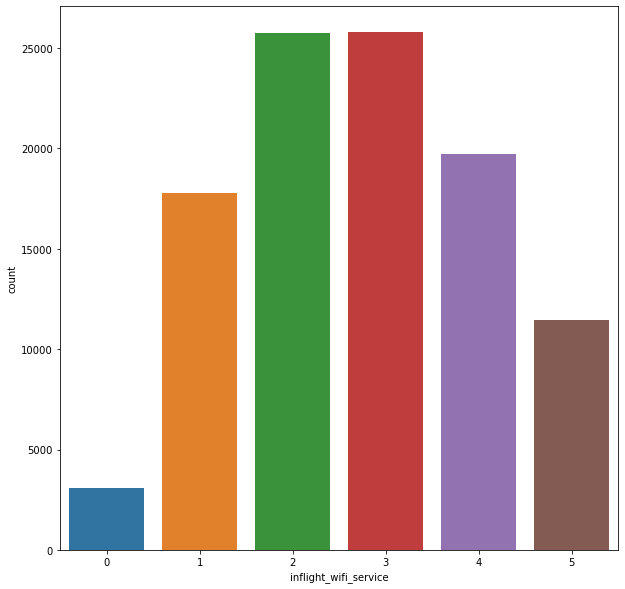

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="inflight_wifi_service", data=df);

##### The airline needs to improve the inflight wifi service

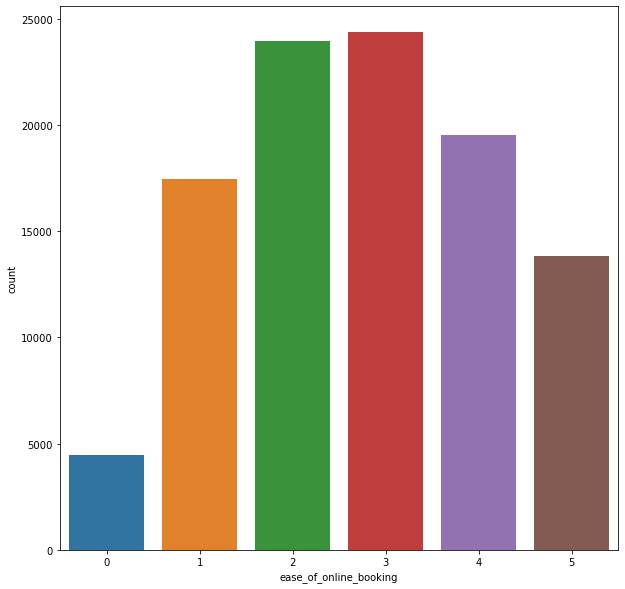

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x="ease_of_online_booking", data=df);

##### The airline should work on easing the online booking so it is convenient for customers to book online

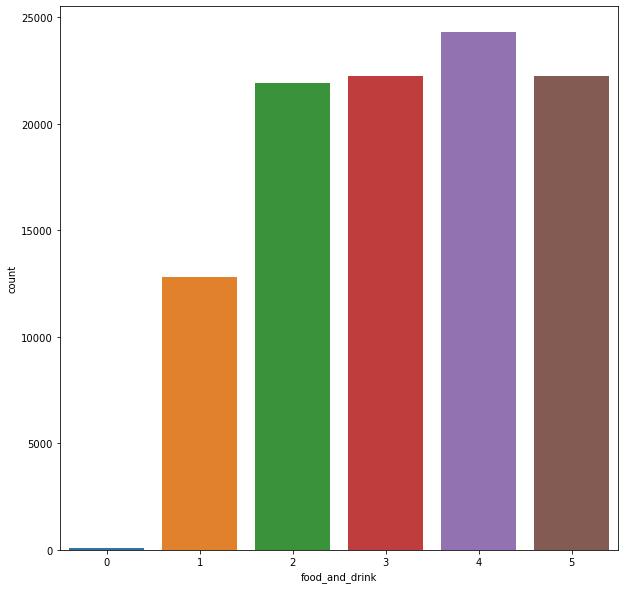

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x="food_and_drink", data=df);

##### The majority of the ratings were 3 and below which indicates that the airline should improve the food and drinks quality

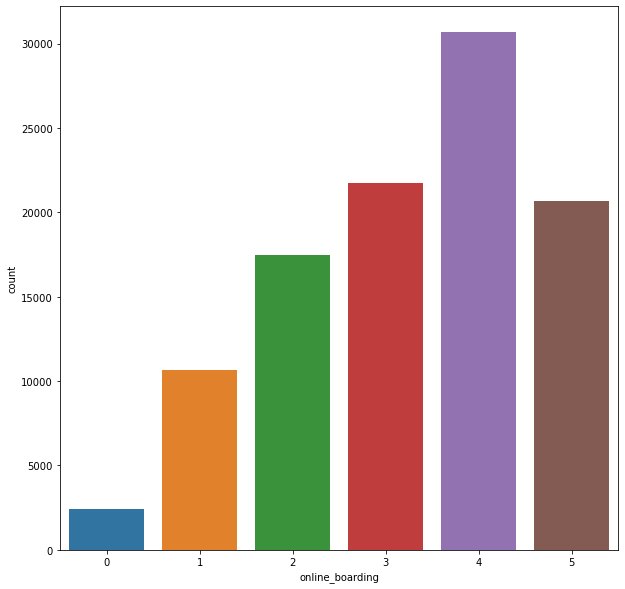

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x="online_boarding", data=df);

##### The majority of the ratings were 4 and above which indicates that customers are satisfied with the online boarding system

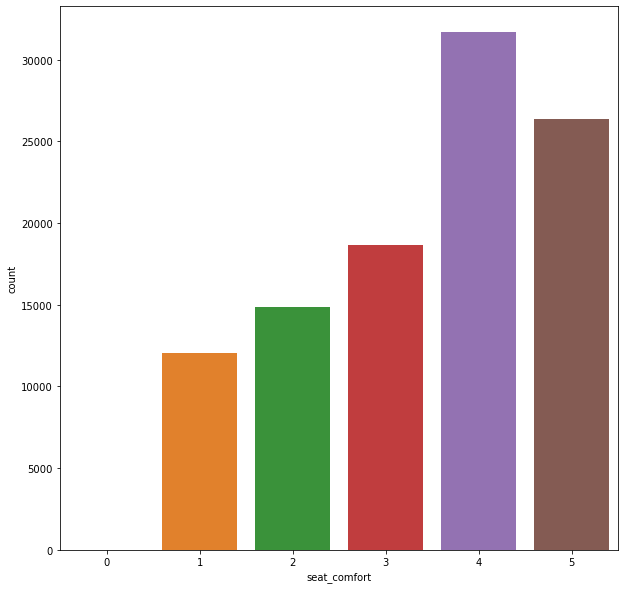

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x="seat_comfort", data=df);

##### The majority of the ratings were 4 and above which shows that customers are satisfied with the seats

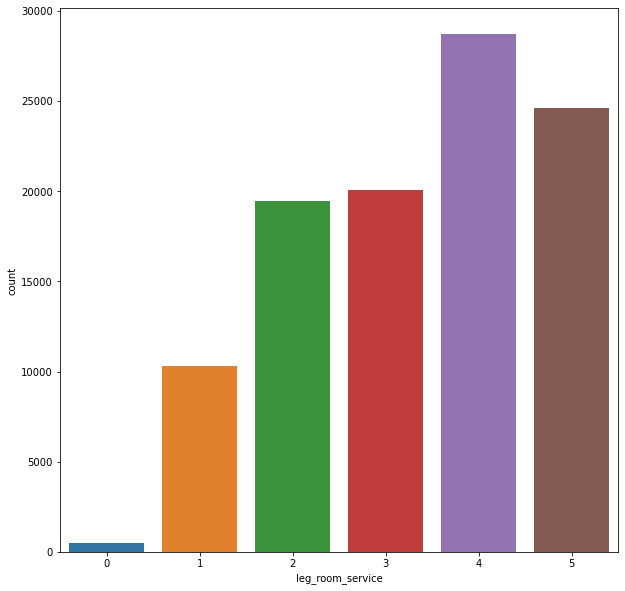

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x="leg_room_service", data=df);

##### The majority of the ratings were 4 and above which shows that customers are satisfied with the leg room service

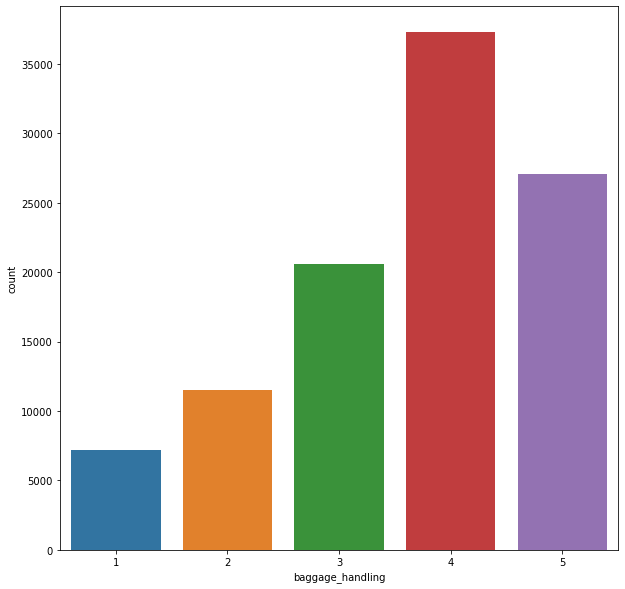

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x="baggage_handling", data=df);

##### The majority of the ratings were 4 and above which shows that customers are satisfied with the baggage handling service

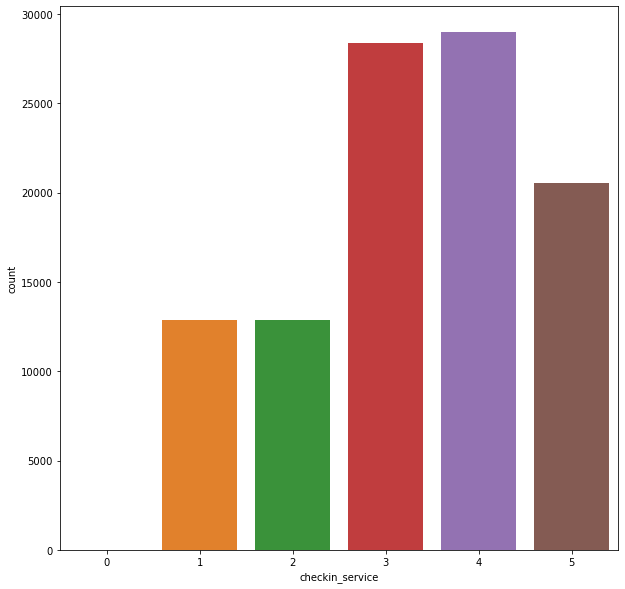

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x="checkin_service", data=df);

##### The majority of the ratings were 3 and below which shows that customers were not happy with the checkin service

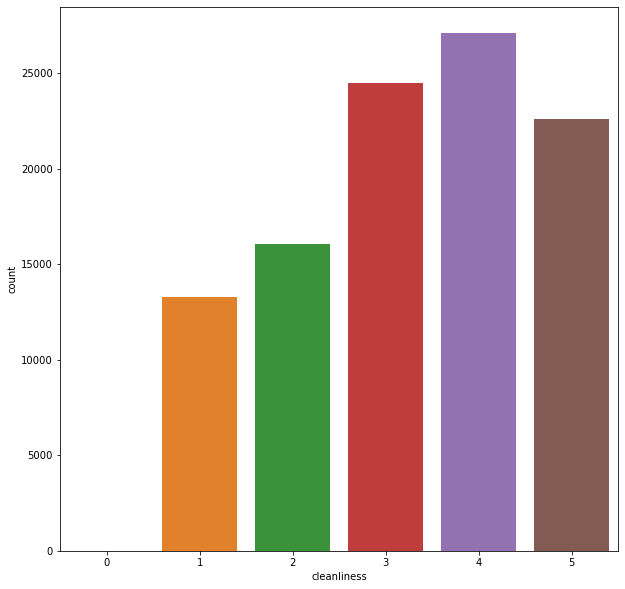

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x="cleanliness", data=df);

###### The majority of the ratings were 3 and below which shows that the customers were not satisfied with the cleanliness

# 8) Handling Outliers

## 8.1) Detecting Outliers

<AxesSubplot:xlabel='flight_distance'>

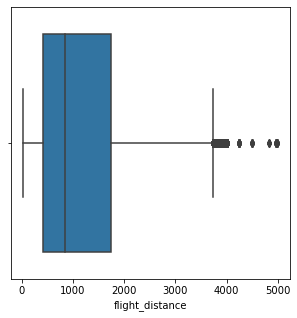

In [29]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["flight_distance"])

<AxesSubplot:xlabel='departure_delay(mins)'>

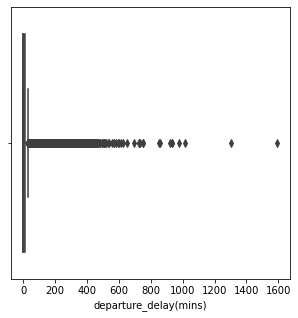

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["departure_delay(mins)"])

<AxesSubplot:xlabel='arrival_delay(mins)'>

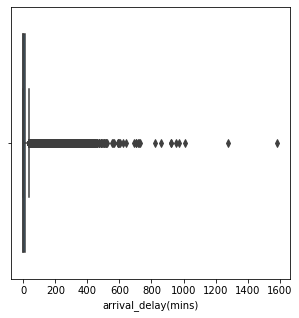

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["arrival_delay(mins)"])

## 8.2) Replacing outliers with median

In [32]:
cols_outliers = ['flight_distance','departure_delay(mins)','arrival_delay(mins)'];

for col in cols_outliers:
    median_val = df[col].quantile(0.50)
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    df[col] = np.where((df[col] < lower) | (df[col] > upper), median_val, df[col])
 

df.describe().T  # T means transpose - will transpose rows to column

col: flight_distance, lower: -1579.5, upper: 3736.5,  median_val: 842.0
col: departure_delay(mins), lower: -18.0, upper: 30.0,  median_val: 0.0
col: arrival_delay(mins), lower: -19.5, upper: 32.5,  median_val: 0.0


,count,mean,std,min,25%,50%,75%,max
id,103594.0,64942.428625,37460.816597,1.0,32562.25,64890.0,97370.5,129880.0
flight_distance,103594.0,1122.105479,911.913616,31.0,414.00,842.0,1620.0,3736.0
inflight_wifi_service,103594.0,2.729753,1.327866,0.0,2.00,3.0,4.0,5.0
convenient_departure_arrival_time,103594.0,3.060081,1.525233,0.0,2.00,3.0,4.0,5.0
ease_of_online_booking,103594.0,2.756984,1.398934,0.0,2.00,3.0,4.0,5.0
gate_location,103594.0,2.977026,1.277723,0.0,2.00,3.0,4.0,5.0
food_and_drink,103594.0,3.202126,1.329401,0.0,2.00,3.0,4.0,5.0
online_boarding,103594.0,3.250497,1.349433,0.0,2.00,3.0,4.0,5.0
seat_comfort,103594.0,3.439765,1.318896,0.0,2.00,4.0,5.0,5.0
inflight_entertainment,103594.0,3.358341,1.333030,0.0,2.00,4.0,4.0,5.0


## 8.3) Analyzing outliers after replacing values with median

<AxesSubplot:xlabel='flight_distance'>

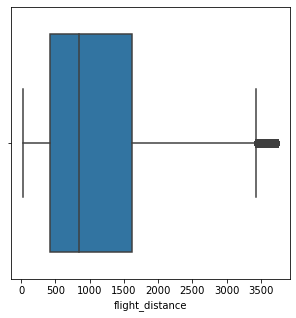

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["flight_distance"])

<AxesSubplot:xlabel='departure_delay(mins)'>

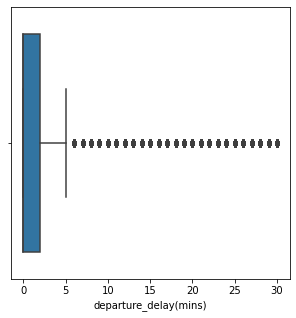

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["departure_delay(mins)"])

<AxesSubplot:xlabel='arrival_delay(mins)'>

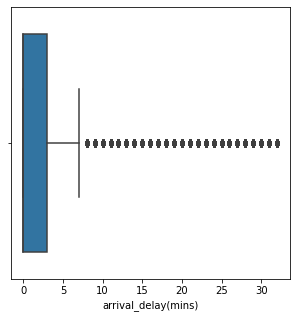

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["arrival_delay(mins)"])

##### Significant improvement can be observed after dealing with the outliers with the median value.

##### Dropping id column as it is irrelevant to the ML model

In [36]:
df.drop('id',axis=1,inplace=True);

# 9) Split the data into training and testing set

In [37]:
cols = ['gender','customer_type','age_split','type_of_travel','class','flight_distance','inflight_wifi_service','convenient_departure_arrival_time',
        'ease_of_online_booking','gate_location','food_and_drink','online_boarding','seat_comfort',
        'inflight_entertainment','onboard_service','leg_room_service','baggage_handling',
        'checkin_service','inflight_service','cleanliness','departure_delay(mins)','arrival_delay(mins)'];

X=df[cols];
y=df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82875, 22)
(82875,)
(20719, 22)
(20719,)


In [39]:
X_train.dtypes

gender                                object
customer_type                         object
age_split                             object
type_of_travel                        object
class                                 object
flight_distance                      float64
inflight_wifi_service                  int64
convenient_departure_arrival_time      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay(mins)                float64
arrival_delay(mins)                  float64
dtype: obj

## 

In [40]:
X_train.head()

,gender,customer_type,age_split,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,gate_location,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins)
18280,Male,Loyal Customer,old,Business travel,Eco Plus,334.0,3,3,3,3,...,3,3,1,4,4,2,3,3,0.0,0.0
14167,Male,Loyal Customer,young,Personal Travel,Eco,89.0,2,5,2,3,...,4,4,4,3,5,4,5,4,0.0,7.0
97853,Female,Loyal Customer,old,Business travel,Business,1127.0,3,3,2,3,...,4,5,5,5,5,3,5,4,1.0,0.0
22012,Male,Loyal Customer,adult,Business travel,Business,239.0,1,1,1,1,...,4,4,4,4,4,3,4,5,0.0,0.0
71365,Female,Loyal Customer,old,Business travel,Business,2300.0,5,5,5,5,...,5,3,3,4,3,5,3,5,23.0,15.0


# 10) Encoding Categorical Variables

## 10.1) Label Encoding Categorical Variables

In [41]:
cols_to_encode = ['class','age_split'];

X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a LabelEncoder
encoder = LabelEncoder()

# 4. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in cols_to_encode:
    # First fit the encoder to the training data
    encoder.fit(X_train[col])
    # Then transform both the training and the testing sets
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Check
X_train.head()

,gender,customer_type,age_split,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,gate_location,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins)
18280,Male,Loyal Customer,1,Business travel,2,334.0,3,3,3,3,...,3,3,1,4,4,2,3,3,0.0,0.0
14167,Male,Loyal Customer,2,Personal Travel,1,89.0,2,5,2,3,...,4,4,4,3,5,4,5,4,0.0,7.0
97853,Female,Loyal Customer,1,Business travel,0,1127.0,3,3,2,3,...,4,5,5,5,5,3,5,4,1.0,0.0
22012,Male,Loyal Customer,0,Business travel,0,239.0,1,1,1,1,...,4,4,4,4,4,3,4,5,0.0,0.0
71365,Female,Loyal Customer,1,Business travel,0,2300.0,5,5,5,5,...,5,3,3,4,3,5,3,5,23.0,15.0


In [42]:
X_train.nunique()

gender                                  2
customer_type                           2
age_split                               3
type_of_travel                          2
class                                   3
flight_distance                      3502
inflight_wifi_service                   6
convenient_departure_arrival_time       6
ease_of_online_booking                  6
gate_location                           6
food_and_drink                          6
online_boarding                         6
seat_comfort                            6
inflight_entertainment                  6
onboard_service                         6
leg_room_service                        6
baggage_handling                        5
checkin_service                         6
inflight_service                        6
cleanliness                             6
departure_delay(mins)                  31
arrival_delay(mins)                    33
dtype: int64

## 10.2) One-hot encoding Categorical Variables

In [43]:
cols_to_onehotencode= ['gender','customer_type','type_of_travel']

enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in cols_to_onehotencode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
    dummies_df = pd.get_dummies(X_train[col]) # generate dataframe of dummies
    X_train.drop([col], axis=1, inplace=True) # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
    ## Fix X_test
    dummies_df = pd.get_dummies(X_test[col])
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)

In [44]:
X_train.dtypes

age_split                              int32
class                                  int32
flight_distance                      float64
inflight_wifi_service                  int64
convenient_departure_arrival_time      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay(mins)                float64
arrival_delay(mins)                  float64
Female                                 uint8
Male                                   uint8
Disloyal Customer                      uint8
Loyal Cust

#### Fixing the types of features

In [45]:
X_train['age_split']=X_train['age_split'].astype('float64')
X_train['class']=X_train['class'].astype('float64')
X_train['Female']=X_train['Female'].astype('float64')
X_train['Male']=X_train['Male'].astype('float64')
X_train['Disloyal Customer']=X_train['Disloyal Customer'].astype('float64')
X_train['Loyal Customer']=X_train['Loyal Customer'].astype('float64')
X_train['Business travel']=X_train['Business travel'].astype('float64')
X_train['Personal Travel']=X_train['Personal Travel'].astype('float64')

X_test['Male']=X_test['Male'].astype('float64')
X_test['Female']=X_test['Female'].astype('float64')
X_test['age_split']=X_test['age_split'].astype('float64')
X_test['class']=X_test['class'].astype('float64')
X_test['Disloyal Customer']=X_test['Disloyal Customer'].astype('float64')
X_test['Loyal Customer']=X_test['Loyal Customer'].astype('float64')
X_test['Business travel']=X_test['Business travel'].astype('float64')
X_test['Personal Travel']=X_test['Personal Travel'].astype('float64')

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82875, 25)
(82875,)
(20719, 25)
(20719,)


In [47]:
X_train.dtypes

age_split                            float64
class                                float64
flight_distance                      float64
inflight_wifi_service                  int64
convenient_departure_arrival_time      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay(mins)                float64
arrival_delay(mins)                  float64
Female                               float64
Male                                 float64
Disloyal Customer                    float64
Loyal Cust

# 11) Feature Selection

In [48]:
X_train.shape

(82875, 25)

In [49]:
cols1 = ['age_split','class','flight_distance','inflight_wifi_service','convenient_departure_arrival_time',
        'ease_of_online_booking','gate_location','food_and_drink','online_boarding','seat_comfort',
        'inflight_entertainment','onboard_service','leg_room_service','baggage_handling',
        'checkin_service','inflight_service','cleanliness','departure_delay(mins)','arrival_delay(mins)','Female'
        ,'Male','Disloyal Customer','Loyal Customer','Business travel','Personal Travel']

X=X_train[cols1];

top_features = SelectKBest(score_func=chi2, k=15).fit(X[cols1],y_train)
df_scores = pd.DataFrame(top_features.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))

                  Features         Score
2          flight_distance  4.686110e+06
8          online_boarding  1.172441e+04
24         Personal Travel  1.152920e+04
1                    class  1.091310e+04
10  inflight_entertainment  6.926368e+03
18     arrival_delay(mins)  5.438081e+03
23         Business travel  5.182635e+03
9             seat_comfort  5.129230e+03
3    inflight_wifi_service  4.244636e+03
11         onboard_service  4.193382e+03
12        leg_room_service  4.137709e+03
16             cleanliness  4.030772e+03
21       Disloyal Customer  2.377021e+03
14         checkin_service  2.204988e+03
7           food_and_drink  2.008966e+03


##### Using feature selection, I have shortlisted top 15 features out of 25, the remaining 10 columns will be dropped

## 12) Data Cleaning

In [50]:
X_train.drop(['age_split','convenient_departure_arrival_time','ease_of_online_booking','gate_location',
              'baggage_handling','inflight_service','departure_delay(mins)','Female','Male','Loyal Customer'],axis=1,
            inplace=True);
X_test.drop(['age_split','convenient_departure_arrival_time','ease_of_online_booking','gate_location',
              'baggage_handling','inflight_service','departure_delay(mins)','Female','Male','Loyal Customer'],axis=1,
            inplace=True);



In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82875, 15)
(82875,)
(20719, 15)
(20719,)


# 13) ML Model

## 13.1) Optimizing Random Forest

In [52]:
param_grid = [
              {"criterion": ["gini", "entropy"], "n_estimators": range(1, 10)}
             ]

# Instantiate a grid search object and fit it to the training data
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.2f}")

Best params: {'criterion': 'gini', 'n_estimators': 8}, score: 0.94


## 13.2) Train, fit and Predict using Random Forest

In [53]:
rfc = RandomForestClassifier(criterion= 'gini', n_estimators= 9).fit(X_train,y_train);
y_pred = rfc.predict(X_test)

## 13.3) Evaluation Metrics for Random Forest

In [54]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

classification_accuracy = accuracy_score(y_test, y_pred)
print(f"classification_accuracy: {classification_accuracy}")

print(classification_report(y_test,y_pred))

True: [1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0]
Pred: [1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0]
classification_accuracy: 0.9446884502147787
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11720
           1       0.95      0.92      0.94      8999

    accuracy                           0.94     20719
   macro avg       0.94      0.94      0.94     20719
weighted avg       0.94      0.94      0.94     20719



## 13.4) ROC curve for Random Forest

AUC: 0.94


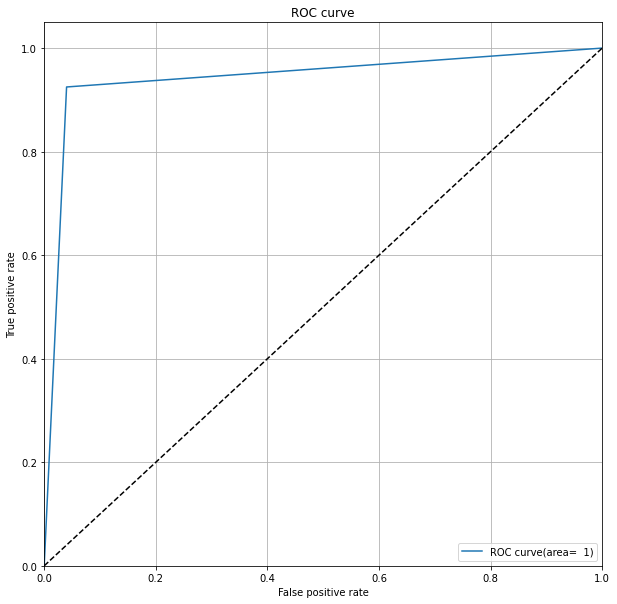

In [55]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
#print(fpr)
#print(tpr)

# Call the auc() function to calculate the area under the curve
# Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
roc_auc = auc(fpr,tpr)
print(f'AUC: {roc_auc:0.2f}') # float 2 places of decimal

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()

## 13.5) Optimizing KNN 

In [56]:
param_grid = [
              {"n_neighbors": range(1, 10)},
              {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"]}
             ]

# Instantiate a grid search object and fit it to the training data
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.2f}")

Best params: {'n_neighbors': 6, 'weights': 'distance'}, score: 0.79


## 13.6) Train, fit and Predict using KNN¶

In [57]:
knc = KNeighborsClassifier(n_neighbors= 6, weights= 'distance').fit(X_train, y_train)
y_pred = knc.predict(X_test)

## 13.7) Evaluation Metrics for KNN

In [58]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

classification_accuracy = accuracy_score(y_test, y_pred)
print(f"classification_accuracy: {classification_accuracy}")

print(classification_report(y_test,y_pred))

True: [1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0]
Pred: [1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0]
classification_accuracy: 0.8400501954727545
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     11720
           1       0.84      0.77      0.81      8999

    accuracy                           0.84     20719
   macro avg       0.84      0.83      0.84     20719
weighted avg       0.84      0.84      0.84     20719



## 13.8) ROC curve for KNN

AUC: 0.83


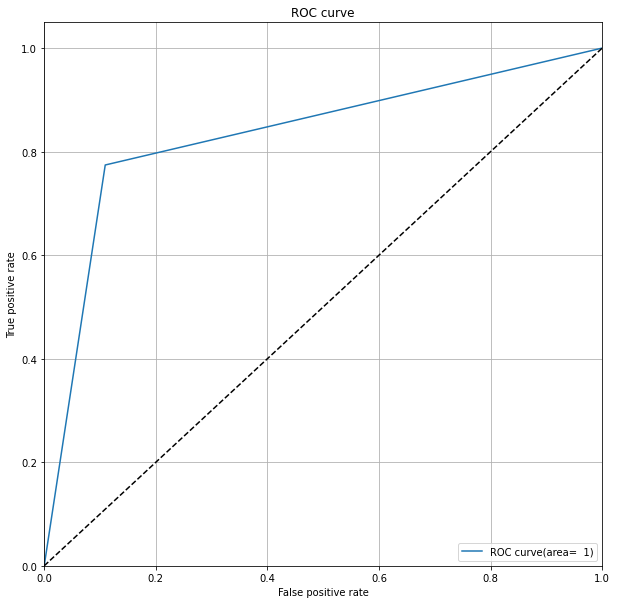

In [59]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
#print(fpr)
#print(tpr)

# Call the auc() function to calculate the area under the curve
# Need to pass the false positive rates (fpr) and true positive rates as parameters to the function
roc_auc = auc(fpr,tpr)
print(f'AUC: {roc_auc:0.2f}') # float 2 places of decimal

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
